<a href="https://colab.research.google.com/github/Hamid-Ba/NYCHotel/blob/main/NYCHotels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier


In [2]:
folder_path = '/content/NYCHotel'

In [3]:
# Load dataset
reviews = []
for filename in os.listdir(folder_path):
    if filename.__contains__("ipynb_checkpoints") or \
       filename.__contains__("Neg") or \
       filename.__contains__("Pos") : continue
    with open(os.path.join(folder_path, filename), 'r',encoding="latin-1") as f:
        review_text = f.read()
        reviews.append(review_text)

In [4]:
# Preprocess data
vectorizer = TfidfVectorizer(stop_words="english", lowercase=True)
X = vectorizer.fit_transform(reviews)

In [5]:
# Cluster data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

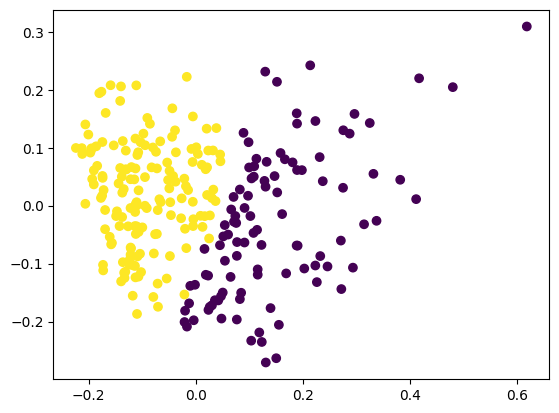

In [6]:
# Visualize clusters (optional)
pca = PCA(n_components=2).fit(X.toarray())
data2D = pca.transform(X.toarray())
plt.scatter(data2D[:,0], data2D[:,1], c=kmeans.labels_)
plt.show()

In [7]:
# Assign labels to reviews based on cluster membership
reviews_labeled = []
for i, review in enumerate(reviews):
    label = ""
    if kmeans.labels_[i] == 1:
        label = "negative"
    else:
        label = "positive"
    reviews_labeled.append({
        "text": review,
        "label": label
    })

In [8]:
# Convert labeled reviews to DataFrame
reviews_df = pd.DataFrame(reviews_labeled)

In [9]:
if os.path.isfile(folder_path+"/Neg/negdata.csv"):
    os.remove(folder_path+"/Neg/negdata.csv")

reviews_df[reviews_df.label=="negative"].to_csv(folder_path+"/Neg/negdata.csv", index=False)

In [10]:
if os.path.isfile(folder_path+"/Pos/posdata.csv"):
    os.remove(folder_path+"/Pos/posdata.csv")
    
reviews_df[reviews_df.label=="positive"].to_csv(folder_path+"/Pos/posdata.csv", index=False)